In [2]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [3]:
def detectCard(input_image):
  headers = {
    # Request headers
    # multipart/form-data!application/octet-stream
    'Content-Type': 'application/octet-stream',
    # Prediction-Keyを書き込む
    'Prediction-key': 'edda64f417094e10ad7f3487ae93caaa',
    }
  params = urllib.parse.urlencode({
    # Request parameters
    'application': '',
    })

  try:
    read_image = open(input_image, "rb", buffering = 0)
    conn = http.client.HTTPSConnection('japaneast.api.cognitive.microsoft.com')
    conn.request("POST", "/customvision/v3.0/Prediction/7fec10e0-7a95-4806-9503-980386643dfa/detect/iterations/Costom_Vision/image?%s" % params, read_image.readall(), headers)
    response = conn.getresponse()
    data = response.read()
    # print(data)
    conn.close()

    # 辞書型への変換
    result = json.loads(data.decode("utf-8"))

    # 可視化
    img = cv2.imread(input_image)

    # 枠線の色
    color = (0, 0, 255)
    for i in result["predictions"]:
      rect = i['boundingBox']
      pt1 = int(rect['left']*float(img.shape[1])), int(rect['top']*float(img.shape[0]))
      pt2 = (int((rect['left']+rect['width'])*float(img.shape[1])), int((rect['top']
                                                                         +rect['height'])*float(img.shape[0])))
      
      if i['probability'] > 0.7:
        # 枠線の書き込み
        cv2.rectangle(img=img, pt1=pt1, pt2=pt2, color=color, thickness=4)


        # 確率の書き込み
        cv2.putText(img,
                text=str(i['probability']),
                org=(int(rect['left']*float(img.shape[1])),int(rect['top']*float(img.shape[0]))),
                fontFace=cv2.FONT_HERSHEY_COMPLEX ,
                fontScale=1,
                color=(255, 255, 255),
                thickness=1)
      
    cv2_imshow(img)
  except Exception as e:
  # 既存のものだとエラーになるため、書き換える
    print(e)

<IPython.core.display.Javascript object>

Saved to /content/drive/MyDrive/we_are.jpg


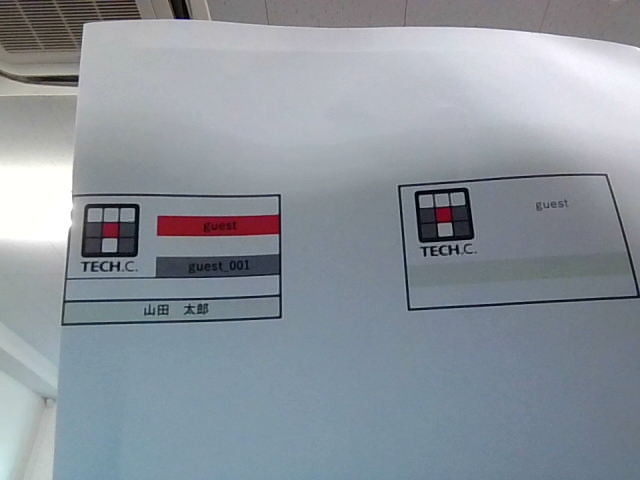

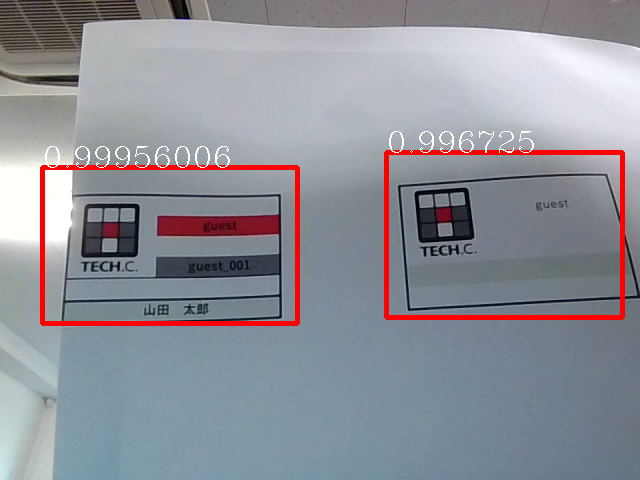

In [14]:
from IPython.display import Image
try:
  filename = take_photo(filename="/content/drive/MyDrive/we_are.jpg",quality=1.0)
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.

  display(Image(filename))
  detectCard("/content/drive/MyDrive/we_are.jpg")
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [5]:
import http.client, urllib.request, urllib.parse, urllib.error, base64

headers = {
    # Request headers
    # multipart/form-data!application/octet-stream
    'Content-Type': 'application/octet-stream',
    # Prediction-Keyを書き込む
    'Prediction-key': 'edda64f417094e10ad7f3487ae93caaa',
}

params = urllib.parse.urlencode({
    # Request parameters
    'application': '',
})


try:
    read_image = open("/content/drive/MyDrive/we.are/WIN_20220212_13_26_06_Pro.jpg","rb",buffering = 0)
    conn = http.client.HTTPSConnection('japaneast.api.cognitive.microsoft.com')
    conn.request("POST", "/customvision/v3.0/Prediction/7fec10e0-7a95-4806-9503-980386643dfa/detect/iterations/Costom_Vision/image?%s" % params, read_image.readall(), headers)
    response = conn.getresponse()
    data = response.read()
    print(data)
    conn.close()
except Exception as e:
  # 既存のものだとエラーになるため、書き換える
  print(e)



b'{"id":"54154308-aaf2-4f09-982b-daa05764fda0","project":"7fec10e0-7a95-4806-9503-980386643dfa","iteration":"eaf56107-dd9d-416d-aa16-daf59265aa74","created":"2022-02-14T03:22:25.491Z","predictions":[{"probability":0.9999244,"tagId":"84082fed-aac5-42ce-a917-401cc5138b74","tagName":"TECH.c","boundingBox":{"left":0.026200663,"top":0.3709918,"width":0.5205299,"height":0.6102501}},{"probability":0.9916869,"tagId":"84082fed-aac5-42ce-a917-401cc5138b74","tagName":"TECH.c","boundingBox":{"left":0.81235254,"top":0.42732882,"width":0.1780132,"height":0.54264736}},{"probability":0.14560561,"tagId":"84082fed-aac5-42ce-a917-401cc5138b74","tagName":"TECH.c","boundingBox":{"left":0.11733539,"top":0.26234844,"width":0.42352867,"height":0.7376516}},{"probability":0.027547581,"tagId":"84082fed-aac5-42ce-a917-401cc5138b74","tagName":"TECH.c","boundingBox":{"left":0.78717077,"top":0.3873662,"width":0.21282923,"height":0.6126338}},{"probability":0.020296132,"tagId":"84082fed-aac5-42ce-a917-401cc5138b74","t

In [6]:
import json

#バイナリ形式ー辞書型へ変換

result =  json.loads(data.decode("utf-8"))

In [7]:
print(result["predictions"])

[{'probability': 0.9999244, 'tagId': '84082fed-aac5-42ce-a917-401cc5138b74', 'tagName': 'TECH.c', 'boundingBox': {'left': 0.026200663, 'top': 0.3709918, 'width': 0.5205299, 'height': 0.6102501}}, {'probability': 0.9916869, 'tagId': '84082fed-aac5-42ce-a917-401cc5138b74', 'tagName': 'TECH.c', 'boundingBox': {'left': 0.81235254, 'top': 0.42732882, 'width': 0.1780132, 'height': 0.54264736}}, {'probability': 0.14560561, 'tagId': '84082fed-aac5-42ce-a917-401cc5138b74', 'tagName': 'TECH.c', 'boundingBox': {'left': 0.11733539, 'top': 0.26234844, 'width': 0.42352867, 'height': 0.7376516}}, {'probability': 0.027547581, 'tagId': '84082fed-aac5-42ce-a917-401cc5138b74', 'tagName': 'TECH.c', 'boundingBox': {'left': 0.78717077, 'top': 0.3873662, 'width': 0.21282923, 'height': 0.6126338}}, {'probability': 0.020296132, 'tagId': '84082fed-aac5-42ce-a917-401cc5138b74', 'tagName': 'TECH.c', 'boundingBox': {'left': 0.7804288, 'top': 0.47542226, 'width': 0.21957117, 'height': 0.447586}}, {'probability': 0.

In [8]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

In [9]:
img = cv2.imread("/content/drive/MyDrive/we.are/WIN_20220212_13_26_06_Pro.jpg")

In [10]:
# 枠線の色
color = (0, 0, 255)
for i in result["predictions"]:
  rect = i['boundingBox']
  pt1 = int(rect['left']*float(img.shape[1])), int(rect['top']*float(img.shape[0]))
  pt2 = (int((rect['left']+rect['width'])*float(img.shape[1])), int((rect['top']
  +rect['height'])*float(img.shape[0])))
  # 枠線の書き込み
  cv2.rectangle(img=img, pt1=pt1, pt2=pt2, color=color, thickness=4)
  # 確率の書き込み
  cv2.putText(img,
              text=str(i['probability']),
              org=(int(rect['left']*float(img.shape[1])),int(rect['top']*float(img.shape[0]))),
              fontFace=cv2.FONT_HERSHEY_COMPLEX ,
              fontScale=1,
              color=(255, 255, 255),
              thickness=1)

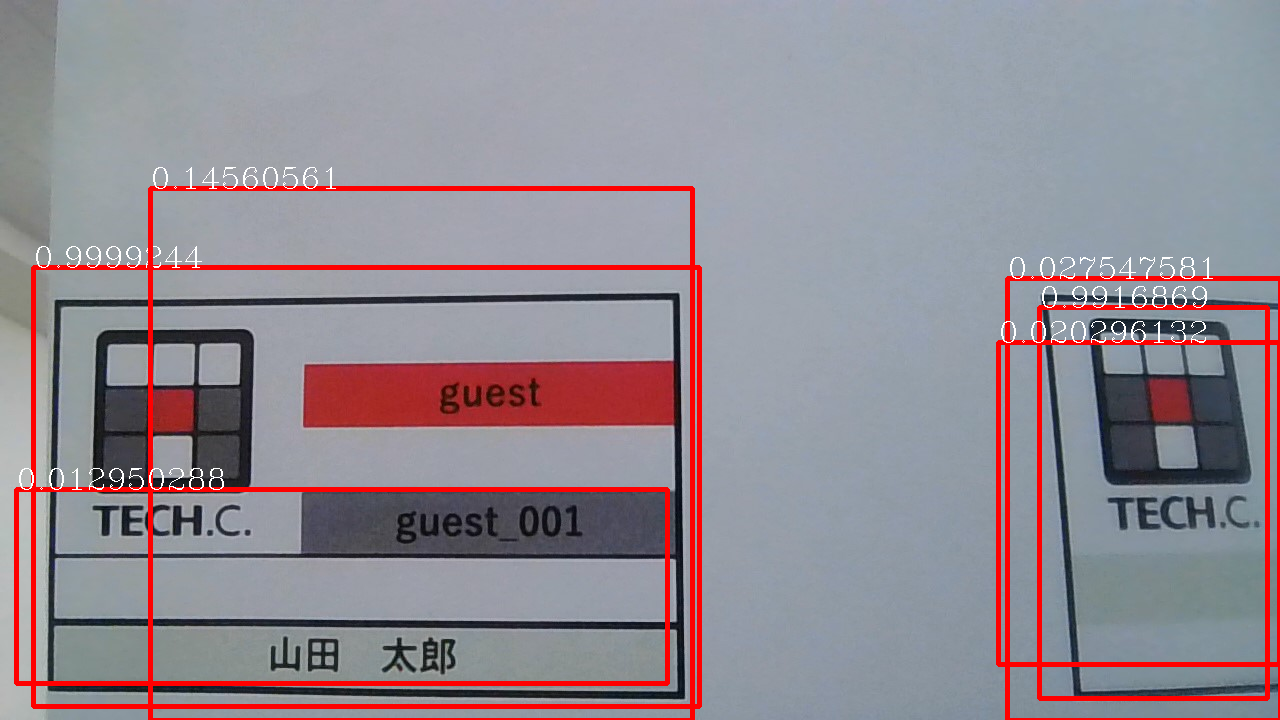

In [11]:
cv2_imshow(img)